# Package as Years NetCDF

In [3]:
!conda install -y xarray

Fetching package metadata .......^C
Traceback (most recent call last):
  File "/opt/conda/bin/conda", line 6, in <module>
    sys.exit(conda.cli.main())
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/main.py", line 182, in main
    return conda_exception_handler(_main, *args)
  File "/opt/conda/lib/python3.6/site-packages/conda/exceptions.py", line 640, in conda_exception_handler
    return_value = func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/main.py", line 140, in _main
    exit_code = args.func(args, p)
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/main_install.py", line 80, in execute
    install(args, parser, 'install')
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/install.py", line 231, in install
    unknown=index_args['unknown'], prefix=prefix)
  File "/opt/conda/lib/python3.6/site-packages/conda/common/io.py", line 174, in decorated
    return f(*args, **kwds)
  File "/opt/conda/lib/python3.6/site-packages/conda/

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import pathlib
import os
import glob
import datetime as dt
from pathlib2 import Path
import multiprocessing, subprocess
import rasterio


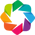

In [2]:
import matplotlib.pyplot as plt
import dask.array as da
import dask.dataframe as dd

import holoviews as hv
from holoviews.operation.datashader import datashade

import datashader as datas
import datashader.transfer_functions as tf

import bokeh.plotting as bp

import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from IPython import display as noteb

hv.notebook_extension('bokeh')
hv.extension('matplotlib')

seed = 7
np.random.seed(seed)

In [3]:
path = "/media/arawlins/Data/UOM/lfmc-pipeline/NolanDead/DFMC/"
OVERWRITE = True

In [4]:

    
def convert(f): 
    """ Converts Arc Grid input files to NetCDF4 """
    fname = (f.split('/')[-1])
    y = (fname[5:9])
    m = (fname[9:11])
    d = (fname[11:13])
    print("%s-%s-%s" % (d, m, y))
    
    netcdf_out = "%s%s_netcdf.nc" %(path, fname) 
    
    if OVERWRITE or not Path(netcdf_out).is_file():
        fname = (f.split('/')[-1])
        y = (fname[5:9])
        m = (fname[9:11])
        d = (fname[11:13])
        print("Processing data for: %s-%s-%s" % (d, m, y))
        netcdf_out = "%s%s_netcdf.nc" %(path, fname) 

        arr = xr.open_rasterio(path+fname)
        arr.name = 'dfmc'
        
        arr = arr.rename({'y':'latitude', 'x':'longitude', 'band':'time'})
        
        arr.coords['time'] = [dt.datetime(int(y), int(m), int(d))]
        
        arr.attrs['units'] = "Percent wet over dry by weight."
        arr.attrs['long_name'] = "Dead Fuel Moisture Content"
        
        arr.attrs['time:units'] = "Days since %s-%s-%s 00:00:00" % (y,m,d)
        
        arr.attrs['crs'] = '+proj=latlong'
        arr.attrs['created'] = "%s" % (dt.datetime.now().strftime("%d-%m-%Y"))
        
#         df = arr.to_dataframe()
        print("XArray is: ", arr)
#         print("Example Data:", df.head())
#         print("Summary Data", df.describe())
                
        print("-------------------------------------------------")
        arr.to_netcdf(netcdf_out, mode='w', format='NETCDF4')
       
        arr.close()
    else:
        print("%s exists already." % (netcdf_out))

In [180]:
files = glob.glob(path+"DFMC_20*.grid")

In [168]:
# Single-threaded conversion
for f in files:
    convert(f)

08-01-2016
Processing data for: 08-01-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-01-08
    created:     06-02-2018
-------------------------------------------------
09-01-2016
Processing data for: 09-01-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-09
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-01-20
    created:     06-02-2018
-------------------------------------------------
21-01-2016
Processing data for: 21-01-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-02-03
    created:     06-02-2018
-------------------------------------------------
04-02-2016
Processing data for: 04-02-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

17-02-2016
Processing data for: 17-02-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-02-17
    created:     06-02-2018
-------------------------------------------------
18-02-2016
Processing data for: 18-02-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-18
  * latitude   (latitude) float64 -10.0 -

03-03-2016
Processing data for: 03-03-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-03-03
    created:     06-02-2018
-------------------------------------------------
04-03-2016
Processing data for: 04-03-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-04
  * latitude   (latitude) float64 -10.0 -

19-03-2016
Processing data for: 19-03-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-03-19
    created:     06-02-2018
-------------------------------------------------
20-03-2016
Processing data for: 20-03-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-20
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-03-31
    created:     06-02-2018
-------------------------------------------------
01-04-2016
Processing data for: 01-04-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-04-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

16-04-2016
Processing data for: 16-04-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-04-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-04-16
    created:     06-02-2018
-------------------------------------------------
17-04-2016
Processing data for: 17-04-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-04-17
  * latitude   (latitude) float64 -10.0 -

01-05-2016
Processing data for: 01-05-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-05-01
    created:     06-02-2018
-------------------------------------------------
02-05-2016
Processing data for: 02-05-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-02
  * latitude   (latitude) float64 -10.0 -

16-05-2016
Processing data for: 16-05-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-05-16
    created:     06-02-2018
-------------------------------------------------
17-05-2016
Processing data for: 17-05-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-17
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-05-28
    created:     06-02-2018
-------------------------------------------------
29-05-2016
Processing data for: 29-05-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-06-12
    created:     06-02-2018
-------------------------------------------------
13-06-2016
Processing data for: 13-06-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

27-06-2016
Processing data for: 27-06-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-06-27
    created:     06-02-2018
-------------------------------------------------
28-06-2016
Processing data for: 28-06-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-28
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-07-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-07-09
    created:     06-02-2018
-------------------------------------------------
10-07-2016
Processing data for: 10-07-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-07-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-07-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-07-23
    created:     06-02-2018
-------------------------------------------------
24-07-2016
Processing data for: 24-07-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-07-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

06-08-2016
Processing data for: 06-08-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-08-06
    created:     06-02-2018
-------------------------------------------------
08-08-2016
Processing data for: 08-08-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-08
  * latitude   (latitude) float64 -10.0 -

20-08-2016
Processing data for: 20-08-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-08-20
    created:     06-02-2018
-------------------------------------------------
21-08-2016
Processing data for: 21-08-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-21
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-09-01
    created:     06-02-2018
-------------------------------------------------
03-09-2016
Processing data for: 03-09-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-09-16
    created:     06-02-2018
-------------------------------------------------
17-09-2016
Processing data for: 17-09-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-06-17
    created:     06-02-2018
-------------------------------------------------
25-06-2016
Processing data for: 25-06-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-09-28
    created:     06-02-2018
-------------------------------------------------
29-09-2016
Processing data for: 29-09-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-10-12
    created:     06-02-2018
-------------------------------------------------
13-10-2016
Processing data for: 13-10-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-10-26
    created:     06-02-2018
-------------------------------------------------
27-10-2016
Processing data for: 27-10-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-11-10
    created:     06-02-2018
-------------------------------------------------
11-11-2016
Processing data for: 11-11-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

23-11-2016
Processing data for: 23-11-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-11-23
    created:     06-02-2018
-------------------------------------------------
24-11-2016
Processing data for: 24-11-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-24
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-12-06
    created:     06-02-2018
-------------------------------------------------
07-12-2016
Processing data for: 07-12-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

09-01-2010
Processing data for: 09-01-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-01-09
    created:     06-02-2018
-------------------------------------------------
10-01-2010
Processing data for: 10-01-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-10
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-01-21
    created:     06-02-2018
-------------------------------------------------
22-01-2010
Processing data for: 22-01-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-02-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-02-05
    created:     06-02-2018
-------------------------------------------------
06-02-2010
Processing data for: 06-02-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

21-02-2010
Processing data for: 21-02-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-02-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-02-21
    created:     06-02-2018
-------------------------------------------------
22-02-2010
Processing data for: 22-02-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-02-22
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-03-06
    created:     06-02-2018
-------------------------------------------------
07-03-2010
Processing data for: 07-03-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

21-03-2010
Processing data for: 21-03-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-03-21
    created:     06-02-2018
-------------------------------------------------
22-03-2010
Processing data for: 22-03-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-22
  * latitude   (latitude) float64 -10.0 -1

06-04-2010
Processing data for: 06-04-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-04-06
    created:     06-02-2018
-------------------------------------------------
07-04-2010
Processing data for: 07-04-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-07
  * latitude   (latitude) float64 -10.0 -

19-04-2010
Processing data for: 19-04-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-04-19
    created:     06-02-2018
-------------------------------------------------
21-04-2010
Processing data for: 21-04-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-21
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-05-02
    created:     06-02-2018
-------------------------------------------------
03-05-2010
Processing data for: 03-05-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

17-05-2010
Processing data for: 17-05-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-05-17
    created:     06-02-2018
-------------------------------------------------
18-05-2010
Processing data for: 18-05-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-18
  * latitude   (latitude) float64 -10.0 -

07-03-2016
Processing data for: 07-03-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-03-07
    created:     06-02-2018
-------------------------------------------------
15-03-2016
Processing data for: 15-03-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-15
  * latitude   (latitude) float64 -10.0 -

29-05-2010
Processing data for: 29-05-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-05-29
    created:     06-02-2018
-------------------------------------------------
30-05-2010
Processing data for: 30-05-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-30
  * latitude   (latitude) float64 -10.0 -

12-06-2010
Processing data for: 12-06-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-06-12
    created:     06-02-2018
-------------------------------------------------
13-06-2010
Processing data for: 13-06-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-13
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-06-24
    created:     06-02-2018
-------------------------------------------------
25-06-2010
Processing data for: 25-06-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-07-08
    created:     06-02-2018
-------------------------------------------------
09-07-2010
Processing data for: 09-07-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-07-22
    created:     06-02-2018
-------------------------------------------------
24-07-2010
Processing data for: 24-07-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-08-05
    created:     06-02-2018
-------------------------------------------------
06-08-2010
Processing data for: 06-08-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-08-19
    created:     06-02-2018
-------------------------------------------------
20-08-2010
Processing data for: 20-08-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

04-09-2010
Processing data for: 04-09-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-09-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-09-04
    created:     06-02-2018
-------------------------------------------------
05-09-2010
Processing data for: 05-09-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-09-05
  * latitude   (latitude) float64 -10.0 -1

19-09-2010
Processing data for: 19-09-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-09-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-09-19
    created:     06-02-2018
-------------------------------------------------
21-09-2010
Processing data for: 21-09-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-09-21
  * latitude   (latitude) float64 -10.0 -1

19-06-2010
Processing data for: 19-06-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-06-19
    created:     06-02-2018
-------------------------------------------------
27-06-2010
Processing data for: 27-06-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-27
  * latitude   (latitude) float64 -10.0 -

16-01-2008
Processing data for: 16-01-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-01-16
    created:     06-02-2018
-------------------------------------------------
14-05-2008
Processing data for: 14-05-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-14
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-04-05
    created:     06-02-2018
-------------------------------------------------
19-08-2012
Processing data for: 19-08-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-09-27
    created:     06-02-2018
-------------------------------------------------
06-02-2017
Processing data for: 06-02-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-10-10
    created:     06-02-2018
-------------------------------------------------
11-10-2010
Processing data for: 11-10-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-10-23
    created:     06-02-2018
-------------------------------------------------
25-10-2010
Processing data for: 25-10-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

08-11-2010
Processing data for: 08-11-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-11-08
    created:     06-02-2018
-------------------------------------------------
09-11-2010
Processing data for: 09-11-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-09
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-11-22
    created:     06-02-2018
-------------------------------------------------
23-11-2010
Processing data for: 23-11-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-12-05
    created:     06-02-2018
-------------------------------------------------
07-12-2010
Processing data for: 07-12-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-12-19
    created:     06-02-2018
-------------------------------------------------
20-12-2010
Processing data for: 20-12-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

09-01-2011
Processing data for: 09-01-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-01-09
    created:     06-02-2018
-------------------------------------------------
10-01-2011
Processing data for: 10-01-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-10
  * latitude   (latitude) float64 -10

21-01-2011
Processing data for: 21-01-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-01-21
    created:     06-02-2018
-------------------------------------------------
23-01-2011
Processing data for: 23-01-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-23
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-02-03
    created:     06-02-2018
-------------------------------------------------
04-02-2011
Processing data for: 04-02-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

16-02-2011
Processing data for: 16-02-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-02-16
    created:     06-02-2018
-------------------------------------------------
07-10-2010
Processing data for: 07-10-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-07
  * latitude   (latitude) float64 -10.0 -

14-01-2011
Processing data for: 14-01-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-01-14
    created:     06-02-2018
-------------------------------------------------
22-01-2011
Processing data for: 22-01-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-22
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-02-27
    created:     06-02-2018
-------------------------------------------------
28-02-2011
Processing data for: 28-02-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

12-03-2011
Processing data for: 12-03-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-03-12
    created:     06-02-2018
-------------------------------------------------
13-03-2011
Processing data for: 13-03-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-13
  * latitude   (latitude) float64 -10.0 -1

26-03-2011
Processing data for: 26-03-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-03-26
    created:     06-02-2018
-------------------------------------------------
27-03-2011
Processing data for: 27-03-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-27
  * latitude   (latitude) float64 -10.0 -1

11-04-2011
Processing data for: 11-04-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-04-11
    created:     06-02-2018
-------------------------------------------------
12-04-2011
Processing data for: 12-04-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-12
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-04-23
    created:     06-02-2018
-------------------------------------------------
24-04-2011
Processing data for: 24-04-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-05-07
    created:     06-02-2018
-------------------------------------------------
08-05-2011
Processing data for: 08-05-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-05-22
    created:     06-02-2018
-------------------------------------------------
23-05-2011
Processing data for: 23-05-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

-------------------------------------------------
05-06-2011
Processing data for: 05-06-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-06-05
    created:     06-02-2018
-------------------------------------------------
06-06-2011
Processing data for: 06-06-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 20

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-06-19
    created:     06-02-2018
-------------------------------------------------
20-06-2011
Processing data for: 20-06-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

02-07-2011
Processing data for: 02-07-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-07-02
    created:     06-02-2018
-------------------------------------------------
25-02-2011
Processing data for: 25-02-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-25
  * latitude   (latitude) float64 -10.0 -

07-06-2011
Processing data for: 07-06-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-06-07
    created:     06-02-2018
-------------------------------------------------
16-06-2011
Processing data for: 16-06-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-16
  * latitude   (latitude) float64 -10.0 -

-------------------------------------------------
15-07-2011
Processing data for: 15-07-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-07-15
    created:     06-02-2018
-------------------------------------------------
16-07-2011
Processing data for: 16-07-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 20

29-07-2011
Processing data for: 29-07-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-07-29
    created:     06-02-2018
-------------------------------------------------
30-07-2011
Processing data for: 30-07-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-30
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-08-11
    created:     06-02-2018
-------------------------------------------------
12-08-2011
Processing data for: 12-08-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-08-25
    created:     06-02-2018
-------------------------------------------------
26-08-2011
Processing data for: 26-08-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-09-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-09-08
    created:     06-02-2018
-------------------------------------------------
10-09-2011
Processing data for: 10-09-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-09-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

24-09-2011
Processing data for: 24-09-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-09-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-09-24
    created:     06-02-2018
-------------------------------------------------
25-09-2011
Processing data for: 25-09-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-09-25
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-10-08
    created:     06-02-2018
-------------------------------------------------
09-10-2011
Processing data for: 09-10-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

23-10-2011
Processing data for: 23-10-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-10-23
    created:     06-02-2018
-------------------------------------------------
24-10-2011
Processing data for: 24-10-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-24
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-11-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-11-06
    created:     06-02-2018
-------------------------------------------------
08-11-2011
Processing data for: 08-11-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-11-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

06-08-2011
Processing data for: 06-08-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-08-06
    created:     06-02-2018
-------------------------------------------------
14-08-2011
Processing data for: 14-08-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-14
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-11-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-11-18
    created:     06-02-2018
-------------------------------------------------
19-11-2011
Processing data for: 19-11-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-11-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-11-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-11-30
    created:     06-02-2018
-------------------------------------------------
01-12-2011
Processing data for: 01-12-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

14-12-2011
Processing data for: 14-12-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-12-14
    created:     06-02-2018
-------------------------------------------------
15-12-2011
Processing data for: 15-12-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-15
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-01-03
    created:     06-02-2018
-------------------------------------------------
04-01-2012
Processing data for: 04-01-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

16-01-2012
Processing data for: 16-01-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-01-16
    created:     06-02-2018
-------------------------------------------------
17-01-2012
Processing data for: 17-01-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-17
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-01-29
    created:     06-02-2018
-------------------------------------------------
30-01-2012
Processing data for: 30-01-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-02-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-02-11
    created:     06-02-2018
-------------------------------------------------
12-02-2012
Processing data for: 12-02-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-02-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

Processing data for: 26-02-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-02-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-02-26
    created:     06-02-2018
-------------------------------------------------
27-02-2012
Processing data for: 27-02-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1

13-03-2012
Processing data for: 13-03-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-03-13
    created:     06-02-2018
-------------------------------------------------
14-03-2012
Processing data for: 14-03-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-14
  * latitude   (latitude) float64 -10.0 -1

    created:     06-02-2018
-------------------------------------------------
26-03-2012
Processing data for: 26-03-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-03-26
    created:     06-02-2018
-------------------------------------------------
28-03-2012
Processing data for: 28-03-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time    

20-12-2011
Processing data for: 20-12-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2011-12-20
    created:     06-02-2018
-------------------------------------------------
26-12-2011
Processing data for: 26-12-2011
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-26
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-03-19
    created:     06-02-2018
-------------------------------------------------
27-03-2012
Processing data for: 27-03-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

17-04-2012
Processing data for: 17-04-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-04-17
    created:     06-02-2018
-------------------------------------------------
18-04-2012
Processing data for: 18-04-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-18
  * latitude   (latitude) float64 -10.0 -

-------------------------------------------------
01-05-2012
Processing data for: 01-05-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-05-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-05-01
    created:     06-02-2018
-------------------------------------------------
02-05-2012
Processing data for: 02-05-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 20

14-05-2012
Processing data for: 14-05-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-05-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-05-14
    created:     06-02-2018
-------------------------------------------------
15-05-2012
Processing data for: 15-05-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-05-15
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-05-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-05-27
    created:     06-02-2018
-------------------------------------------------
28-05-2012
Processing data for: 28-05-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-05-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-06-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-06-09
    created:     06-02-2018
-------------------------------------------------
10-06-2012
Processing data for: 10-06-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-06-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

23-06-2012
Processing data for: 23-06-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-06-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-06-23
    created:     06-02-2018
-------------------------------------------------
24-06-2012
Processing data for: 24-06-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-06-24
  * latitude   (latitude) float64 -10.0 -

08-07-2012
Processing data for: 08-07-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-07-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-07-08
    created:     06-02-2018
-------------------------------------------------
09-07-2012
Processing data for: 09-07-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-07-09
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-07-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-07-21
    created:     06-02-2018
-------------------------------------------------
22-07-2012
Processing data for: 22-07-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-07-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

    created:     06-02-2018
-------------------------------------------------
06-08-2012
Processing data for: 06-08-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-08-06
    created:     06-02-2018
-------------------------------------------------
07-08-2012
Processing data for: 07-08-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time    

18-08-2012
Processing data for: 18-08-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-08-18
    created:     06-02-2018
-------------------------------------------------
13-04-2012
Processing data for: 13-04-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-13
  * latitude   (latitude) float64 -10.0 -1

02-08-2012
Processing data for: 02-08-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-08-02
    created:     06-02-2018
-------------------------------------------------
10-08-2012
Processing data for: 10-08-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-10
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-08-31
    created:     06-02-2018
-------------------------------------------------
01-09-2012
Processing data for: 01-09-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

14-09-2012
Processing data for: 14-09-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-09-14
    created:     06-02-2018
-------------------------------------------------
15-09-2012
Processing data for: 15-09-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-15
  * latitude   (latitude) float64 -10.0 -1

29-09-2012
Processing data for: 29-09-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-09-29
    created:     06-02-2018
-------------------------------------------------
01-10-2012
Processing data for: 01-10-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-01
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-10-12
    created:     06-02-2018
-------------------------------------------------
13-10-2012
Processing data for: 13-10-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-10-25
    created:     06-02-2018
-------------------------------------------------
27-10-2012
Processing data for: 27-10-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-11-08
    created:     06-02-2018
-------------------------------------------------
09-11-2012
Processing data for: 09-11-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

24-11-2012
Processing data for: 24-11-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-11-24
    created:     06-02-2018
-------------------------------------------------
25-11-2012
Processing data for: 25-11-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-25
  * latitude   (latitude) float64 -10

08-12-2012
Processing data for: 08-12-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-12-08
    created:     06-02-2018
-------------------------------------------------
09-12-2012
Processing data for: 09-12-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-09
  * latitude   (latitude) float64 -10.0 -

23-12-2012
Processing data for: 23-12-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-12-23
    created:     06-02-2018
-------------------------------------------------
25-12-2012
Processing data for: 25-12-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-25
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-10-17
    created:     06-02-2018
-------------------------------------------------
26-10-2012
Processing data for: 26-10-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-01-10
    created:     06-02-2018
-------------------------------------------------
11-01-2013
Processing data for: 11-01-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-01-22
    created:     06-02-2018
-------------------------------------------------
23-01-2013
Processing data for: 23-01-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-02-05
    created:     06-02-2018
-------------------------------------------------
06-02-2013
Processing data for: 06-02-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-02-19
    created:     06-02-2018
-------------------------------------------------
20-02-2013
Processing data for: 20-02-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-03-04
    created:     06-02-2018
-------------------------------------------------
05-03-2013
Processing data for: 05-03-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

18-03-2013
Processing data for: 18-03-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-03-18
    created:     06-02-2018
-------------------------------------------------
19-03-2013
Processing data for: 19-03-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-19
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-03-31
    created:     06-02-2018
-------------------------------------------------
01-04-2013
Processing data for: 01-04-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-04-14
    created:     06-02-2018
-------------------------------------------------
15-04-2013
Processing data for: 15-04-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

28-04-2013
Processing data for: 28-04-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-04-28
    created:     06-02-2018
-------------------------------------------------
29-04-2013
Processing data for: 29-04-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-29
  * latitude   (latitude) float64 -10.0 -

11-05-2013
Processing data for: 11-05-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-05-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-05-11
    created:     06-02-2018
-------------------------------------------------
12-05-2013
Processing data for: 12-05-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-05-12
  * latitude   (latitude) float64 -10.0 -

02-02-2013
Processing data for: 02-02-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-02-02
    created:     06-02-2018
-------------------------------------------------
10-02-2013
Processing data for: 10-02-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-10
  * latitude   (latitude) float64 -10.0 -

24-05-2013
Processing data for: 24-05-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-05-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-05-24
    created:     06-02-2018
-------------------------------------------------
25-05-2013
Processing data for: 25-05-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-05-25
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-06-07
    created:     06-02-2018
-------------------------------------------------
08-06-2013
Processing data for: 08-06-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

21-06-2013
Processing data for: 21-06-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-06-21
    created:     06-02-2018
-------------------------------------------------
22-06-2013
Processing data for: 22-06-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-22
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-07-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-07-03
    created:     06-02-2018
-------------------------------------------------
05-07-2013
Processing data for: 05-07-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-07-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

18-07-2013
Processing data for: 18-07-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-07-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-07-18
    created:     06-02-2018
-------------------------------------------------
19-07-2013
Processing data for: 19-07-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-07-19
  * latitude   (latitude) float64 -10.0 -

01-08-2013
Processing data for: 01-08-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-08-01
    created:     06-02-2018
-------------------------------------------------
02-08-2013
Processing data for: 02-08-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-02
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-08-14
    created:     06-02-2018
-------------------------------------------------
15-08-2013
Processing data for: 15-08-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-08-28
    created:     06-02-2018
-------------------------------------------------
29-08-2013
Processing data for: 29-08-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

11-09-2013
Processing data for: 11-09-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-09-11
    created:     06-02-2018
-------------------------------------------------
12-09-2013
Processing data for: 12-09-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-12
  * latitude   (latitude) float64 -10.0 -1

24-09-2013
Processing data for: 24-09-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-09-24
    created:     06-02-2018
-------------------------------------------------
25-09-2013
Processing data for: 25-09-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-25
  * latitude   (latitude) float64 -10.0 -1

17-06-2013
Processing data for: 17-06-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-06-17
    created:     06-02-2018
-------------------------------------------------
26-06-2013
Processing data for: 26-06-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-26
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 29.009064 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-10-07
    created:     06-02-2018
-------------------------------------------------
08-10-2013
Processing data for: 08-10-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 29.009064 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-10-20
    created:     06-02-2018
-------------------------------------------------
21-10-2013
Processing data for: 21-10-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

03-11-2013
Processing data for: 03-11-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-11-03
    created:     06-02-2018
-------------------------------------------------
04-11-2013
Processing data for: 04-11-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-04
  * latitude   (latitude) float64 -10

15-11-2013
Processing data for: 15-11-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-11-15
    created:     06-02-2018
-------------------------------------------------
16-11-2013
Processing data for: 16-11-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-16
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-11-29
    created:     06-02-2018
-------------------------------------------------
30-11-2013
Processing data for: 30-11-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-12-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-12-12
    created:     06-02-2018
-------------------------------------------------
14-12-2013
Processing data for: 14-12-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-12-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-01-05
    created:     06-02-2018
-------------------------------------------------
06-01-2014
Processing data for: 06-01-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

19-01-2014
Processing data for: 19-01-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-01-19
    created:     06-02-2018
-------------------------------------------------
20-01-2014
Processing data for: 20-01-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-20
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-02-02
    created:     06-02-2018
-------------------------------------------------
03-02-2014
Processing data for: 03-02-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

16-02-2014
Processing data for: 16-02-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-02-16
    created:     06-02-2018
-------------------------------------------------
17-02-2014
Processing data for: 17-02-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-17
  * latitude   (latitude) float64 -10.0 -

17-11-2013
Processing data for: 17-11-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2013-11-17
    created:     06-02-2018
-------------------------------------------------
26-11-2013
Processing data for: 26-11-2013
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-26
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-02-26
    created:     06-02-2018
-------------------------------------------------
27-02-2014
Processing data for: 27-02-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-03-11
    created:     06-02-2018
-------------------------------------------------
12-03-2014
Processing data for: 12-03-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-03-25
    created:     06-02-2018
-------------------------------------------------
26-03-2014
Processing data for: 26-03-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-04-08
    created:     06-02-2018
-------------------------------------------------
09-04-2014
Processing data for: 09-04-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-04-22
    created:     06-02-2018
-------------------------------------------------
23-04-2014
Processing data for: 23-04-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

06-05-2014
Processing data for: 06-05-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-05-06
    created:     06-02-2018
-------------------------------------------------
07-05-2014
Processing data for: 07-05-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-07
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-05-19
    created:     06-02-2018
-------------------------------------------------
21-05-2014
Processing data for: 21-05-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-06-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-06-02
    created:     06-02-2018
-------------------------------------------------
03-06-2014
Processing data for: 03-06-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-06-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-06-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-06-16
    created:     06-02-2018
-------------------------------------------------
17-06-2014
Processing data for: 17-06-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-06-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

-------------------------------------------------
01-07-2014
Processing data for: 01-07-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-07-01
    created:     06-02-2018
-------------------------------------------------
03-07-2014
Processing data for: 03-07-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2

16-04-2014
Processing data for: 16-04-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-04-16
    created:     06-02-2018
-------------------------------------------------
24-04-2014
Processing data for: 24-04-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-24
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-07-14
    created:     06-02-2018
-------------------------------------------------
15-07-2014
Processing data for: 15-07-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

28-07-2014
Processing data for: 28-07-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-07-28
    created:     06-02-2018
-------------------------------------------------
29-07-2014
Processing data for: 29-07-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-29
  * latitude   (latitude) float64 -10.0 

11-08-2014
Processing data for: 11-08-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-08-11
    created:     06-02-2018
-------------------------------------------------
12-08-2014
Processing data for: 12-08-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-12
  * latitude   (latitude) float64 -10.0 -

25-08-2014
Processing data for: 25-08-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-08-25
    created:     06-02-2018
-------------------------------------------------
26-08-2014
Processing data for: 26-08-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-26
  * latitude   (latitude) float64 -10.0 -

-------------------------------------------------
08-09-2014
Processing data for: 08-09-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-09-08
    created:     06-02-2018
-------------------------------------------------
09-09-2014
Processing data for: 09-09-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 20

-------------------------------------------------
21-09-2014
Processing data for: 21-09-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-09-21
    created:     06-02-2018
-------------------------------------------------
22-09-2014
Processing data for: 22-09-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 20

05-10-2014
Processing data for: 05-10-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-10-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-10-05
    created:     06-02-2018
-------------------------------------------------
06-10-2014
Processing data for: 06-10-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-10-06
  * latitude   (latitude) float64 -10.0 -1

18-10-2014
Processing data for: 18-10-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-10-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-10-18
    created:     06-02-2018
-------------------------------------------------
19-10-2014
Processing data for: 19-10-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-10-19
  * latitude   (latitude) float64 -10.0 -1

01-11-2014
Processing data for: 01-11-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-11-01
    created:     06-02-2018
-------------------------------------------------
02-11-2014
Processing data for: 02-11-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-02
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-11-16
    created:     06-02-2018
-------------------------------------------------
17-11-2014
Processing data for: 17-11-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-09-07
    created:     06-02-2018
-------------------------------------------------
16-09-2014
Processing data for: 16-09-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

28-11-2014
Processing data for: 28-11-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-11-28
    created:     06-02-2018
-------------------------------------------------
29-11-2014
Processing data for: 29-11-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-29
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-12-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-12-11
    created:     06-02-2018
-------------------------------------------------
12-12-2014
Processing data for: 12-12-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-12-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-12-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-12-25
    created:     06-02-2018
-------------------------------------------------
26-12-2014
Processing data for: 26-12-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-12-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-01-16
    created:     06-02-2018
-------------------------------------------------
17-01-2015
Processing data for: 17-01-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

30-01-2015
Processing data for: 30-01-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-01-30
    created:     06-02-2018
-------------------------------------------------
31-01-2015
Processing data for: 31-01-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-31
  * latitude   (latitude) float64 -10

13-02-2015
Processing data for: 13-02-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-02-13
    created:     06-02-2018
-------------------------------------------------
14-02-2015
Processing data for: 14-02-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-14
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-02-26
    created:     06-02-2018
-------------------------------------------------
27-02-2015
Processing data for: 27-02-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

13-03-2015
Processing data for: 13-03-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-03-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-03-13
    created:     06-02-2018
-------------------------------------------------
14-03-2015
Processing data for: 14-03-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-03-14
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-03-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-03-28
    created:     06-02-2018
-------------------------------------------------
29-03-2015
Processing data for: 29-03-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-03-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-04-10
    created:     06-02-2018
-------------------------------------------------
11-04-2015
Processing data for: 11-04-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-02-12
    created:     06-02-2018
-------------------------------------------------
21-02-2015
Processing data for: 21-02-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-04-19
    created:     06-02-2018
-------------------------------------------------
20-04-2015
Processing data for: 20-04-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-05-03
    created:     06-02-2018
-------------------------------------------------
04-05-2015
Processing data for: 04-05-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-05-18
    created:     06-02-2018
-------------------------------------------------
19-05-2015
Processing data for: 19-05-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-05-31
    created:     06-02-2018
-------------------------------------------------
01-06-2015
Processing data for: 01-06-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

14-06-2015
Processing data for: 14-06-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-06-14
    created:     06-02-2018
-------------------------------------------------
15-06-2015
Processing data for: 15-06-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-15
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-06-26
    created:     06-02-2018
-------------------------------------------------
27-06-2015
Processing data for: 27-06-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-07-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-07-11
    created:     06-02-2018
-------------------------------------------------
12-07-2015
Processing data for: 12-07-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-07-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

25-07-2015
Processing data for: 25-07-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-07-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-07-25
    created:     06-02-2018
-------------------------------------------------
26-07-2015
Processing data for: 26-07-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-07-26
  * latitude   (latitude) float64 -10.0 

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-08-06
    created:     06-02-2018
-------------------------------------------------
07-08-2015
Processing data for: 07-08-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-08-20
    created:     06-02-2018
-------------------------------------------------
21-08-2015
Processing data for: 21-08-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-06-11
    created:     06-02-2018
-------------------------------------------------
20-06-2015
Processing data for: 20-06-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

01-09-2015
Processing data for: 01-09-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-09-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-09-01
    created:     06-02-2018
-------------------------------------------------
02-09-2015
Processing data for: 02-09-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-09-02
  * latitude   (latitude) float64 -10.0 -

16-09-2015
Processing data for: 16-09-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-09-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-09-16
    created:     06-02-2018
-------------------------------------------------
17-09-2015
Processing data for: 17-09-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-09-17
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-09-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-09-28
    created:     06-02-2018
-------------------------------------------------
29-09-2015
Processing data for: 29-09-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-09-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

13-10-2015
Processing data for: 13-10-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-10-13
    created:     06-02-2018
-------------------------------------------------
14-10-2015
Processing data for: 14-10-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-14
  * latitude   (latitude) float64 -10.0 -1

28-10-2015
Processing data for: 28-10-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-10-28
    created:     06-02-2018
-------------------------------------------------
29-10-2015
Processing data for: 29-10-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-29
  * latitude   (latitude) float64 -10.0 -1

10-11-2015
Processing data for: 10-11-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-11-10
    created:     06-02-2018
-------------------------------------------------
12-11-2015
Processing data for: 12-11-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-12
  * latitude   (latitude) float64 -10

24-11-2015
Processing data for: 24-11-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-11-24
    created:     06-02-2018
-------------------------------------------------
25-11-2015
Processing data for: 25-11-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-25
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-12-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-12-06
    created:     06-02-2018
-------------------------------------------------
08-12-2015
Processing data for: 08-12-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-12-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

20-12-2015
Processing data for: 20-12-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-12-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-12-20
    created:     06-02-2018
-------------------------------------------------
21-12-2015
Processing data for: 21-12-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-12-21
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-12-25
    created:     06-02-2018
-------------------------------------------------
30-12-2010
Processing data for: 30-12-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2012-01-01
    created:     06-02-2018
-------------------------------------------------
31-12-2012
Processing data for: 31-12-2012
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2014-01-01
    created:     06-02-2018
-------------------------------------------------
02-01-2014
Processing data for: 02-01-2014
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-01-04
    created:     06-02-2018
-------------------------------------------------
05-01-2016
Processing data for: 05-01-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2015-11-20
    created:     06-02-2018
-------------------------------------------------
28-11-2015
Processing data for: 28-11-2015
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

02-01-2017
Processing data for: 02-01-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-01-02
    created:     06-02-2018
-------------------------------------------------
04-01-2010
Processing data for: 04-01-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-04
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-01-15
    created:     06-02-2018
-------------------------------------------------
17-01-2008
Processing data for: 17-01-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

29-01-2008
Processing data for: 29-01-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-01-29
    created:     06-02-2018
-------------------------------------------------
30-01-2008
Processing data for: 30-01-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-30
  * latitude   (latitude) float64 -10

12-02-2008
Processing data for: 12-02-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-02-12
    created:     06-02-2018
-------------------------------------------------
13-02-2008
Processing data for: 13-02-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-13
  * latitude   (latitude) float64 -10.0 -

    created:     06-02-2018
-------------------------------------------------
26-02-2008
Processing data for: 26-02-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-02-26
    created:     06-02-2018
-------------------------------------------------
28-02-2008
Processing data for: 28-02-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time   

10-03-2008
Processing data for: 10-03-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-03-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-03-10
    created:     06-02-2018
-------------------------------------------------
11-03-2008
Processing data for: 11-03-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-03-11
  * latitude   (latitude) float64 -10.0 -

23-03-2008
Processing data for: 23-03-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-03-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-03-23
    created:     06-02-2018
-------------------------------------------------
25-03-2008
Processing data for: 25-03-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-03-25
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-04-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-04-05
    created:     06-02-2018
-------------------------------------------------
06-04-2008
Processing data for: 06-04-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-04-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

19-04-2008
Processing data for: 19-04-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-04-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-04-19
    created:     06-02-2018
-------------------------------------------------
20-04-2008
Processing data for: 20-04-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-04-20
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-05-01
    created:     06-02-2018
-------------------------------------------------
02-05-2008
Processing data for: 02-05-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-01-17
    created:     06-02-2018
-------------------------------------------------
25-01-2010
Processing data for: 25-01-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2010-04-29
    created:     06-02-2018
-------------------------------------------------
07-05-2010
Processing data for: 07-05-2010
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

26-05-2008
Processing data for: 26-05-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-05-26
    created:     06-02-2018
-------------------------------------------------
27-05-2008
Processing data for: 27-05-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-27
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-06-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-06-07
    created:     06-02-2018
-------------------------------------------------
09-06-2008
Processing data for: 09-06-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-06-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

21-06-2008
Processing data for: 21-06-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-06-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-06-21
    created:     06-02-2018
-------------------------------------------------
22-06-2008
Processing data for: 22-06-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-06-22
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-07-05
    created:     06-02-2018
-------------------------------------------------
06-07-2008
Processing data for: 06-07-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-07-18
    created:     06-02-2018
-------------------------------------------------
19-07-2008
Processing data for: 19-07-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-08-01
    created:     06-02-2018
-------------------------------------------------
02-08-2008
Processing data for: 02-08-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-08-14
    created:     06-02-2018
-------------------------------------------------
16-08-2008
Processing data for: 16-08-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

29-08-2008
Processing data for: 29-08-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-08-29
    created:     06-02-2018
-------------------------------------------------
30-08-2008
Processing data for: 30-08-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-30
  * latitude   (latitude) float64 -10.0 -

13-09-2008
Processing data for: 13-09-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-09-13
    created:     06-02-2018
-------------------------------------------------
14-09-2008
Processing data for: 14-09-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-14
  * latitude   (latitude) float64 -10.0 -

29-07-2008
Processing data for: 29-07-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-07-29
    created:     06-02-2018
-------------------------------------------------
07-08-2008
Processing data for: 07-08-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-07
  * latitude   (latitude) float64 -10.0 

25-09-2008
Processing data for: 25-09-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-09-25
    created:     06-02-2018
-------------------------------------------------
26-09-2008
Processing data for: 26-09-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-26
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.950573 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-10-09
    created:     06-02-2018
-------------------------------------------------
10-10-2008
Processing data for: 10-10-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

24-10-2008
Processing data for: 24-10-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.950573 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-10-24
    created:     06-02-2018
-------------------------------------------------
25-10-2008
Processing data for: 25-10-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-25
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-11-06
    created:     06-02-2018
-------------------------------------------------
07-11-2008
Processing data for: 07-11-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-11-20
    created:     06-02-2018
-------------------------------------------------
21-11-2008
Processing data for: 21-11-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-12-03
    created:     06-02-2018
-------------------------------------------------
05-12-2008
Processing data for: 05-12-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-12-17
    created:     06-02-2018
-------------------------------------------------
18-12-2008
Processing data for: 18-12-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

01-01-2009
Processing data for: 01-01-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-01-01
    created:     06-02-2018
-------------------------------------------------
02-01-2009
Processing data for: 02-01-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-02
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-01-14
    created:     06-02-2018
-------------------------------------------------
16-01-2009
Processing data for: 16-01-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

28-01-2009
Processing data for: 28-01-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-01-28
    created:     06-02-2018
-------------------------------------------------
29-01-2009
Processing data for: 29-01-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-29
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-11-25
    created:     06-02-2018
-------------------------------------------------
04-12-2008
Processing data for: 04-12-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-02-06
    created:     06-02-2018
-------------------------------------------------
07-02-2009
Processing data for: 07-02-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

20-02-2009
Processing data for: 20-02-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.975636 28.909966 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-02-20
    created:     06-02-2018
-------------------------------------------------
21-02-2009
Processing data for: 21-02-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-21
  * latitude   (latitude) float64 -10.0 -

05-03-2009
Processing data for: 05-03-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-03-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-03-05
    created:     06-02-2018
-------------------------------------------------
06-03-2009
Processing data for: 06-03-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-03-06
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-03-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.590107 18.58887 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-03-19
    created:     06-02-2018
-------------------------------------------------
20-03-2009
Processing data for: 20-03-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-03-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

03-04-2009
Processing data for: 03-04-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-04-03
    created:     06-02-2018
-------------------------------------------------
04-04-2009
Processing data for: 04-04-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-04
  * latitude   (latitude) float64 -10.0 -

17-04-2009
Processing data for: 17-04-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-04-17
    created:     06-02-2018
-------------------------------------------------
18-04-2009
Processing data for: 18-04-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-18
  * latitude   (latitude) float64 -10.0 -

02-05-2009
Processing data for: 02-05-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-05-02
    created:     06-02-2018
-------------------------------------------------
03-05-2009
Processing data for: 03-05-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-03
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-05-15
    created:     06-02-2018
-------------------------------------------------
16-05-2009
Processing data for: 16-05-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.229389 11.227526 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-05-28
    created:     06-02-2018
-------------------------------------------------
29-05-2009
Processing data for: 29-05-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-06-11
    created:     06-02-2018
-------------------------------------------------
12-06-2009
Processing data for: 12-06-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101075 12.099401 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-04-10
    created:     06-02-2018
-------------------------------------------------
19-04-2009
Processing data for: 19-04-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.250744 12.248449 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-06-21
    created:     06-02-2018
-------------------------------------------------
22-06-2009
Processing data for: 22-06-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-07-05
    created:     06-02-2018
-------------------------------------------------
06-07-2009
Processing data for: 06-07-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.427311 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-07-18
    created:     06-02-2018
-------------------------------------------------
19-07-2009
Processing data for: 19-07-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-08-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-08-02
    created:     06-02-2018
-------------------------------------------------
03-08-2009
Processing data for: 03-08-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-08-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-08-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-08-17
    created:     06-02-2018
-------------------------------------------------
18-08-2009
Processing data for: 18-08-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-08-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-08-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.35011 15.327256 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-08-31
    created:     06-02-2018
-------------------------------------------------
01-09-2009
Processing data for: 01-09-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-09-14
    created:     06-02-2018
-------------------------------------------------
15-09-2009
Processing data for: 15-09-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

29-09-2009
Processing data for: 29-09-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-09-29
    created:     06-02-2018
-------------------------------------------------
30-09-2009
Processing data for: 30-09-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-30
  * latitude   (latitude) float64 -10.0 -1

12-10-2009
Processing data for: 12-10-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-10-12
    created:     06-02-2018
-------------------------------------------------
13-10-2009
Processing data for: 13-10-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-13
  * latitude   (latitude) float64 -10.0 -

26-10-2009
Processing data for: 26-10-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.051304 28.959885 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-10-26
    created:     06-02-2018
-------------------------------------------------
27-10-2009
Processing data for: 27-10-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-27
  * latitude   (latitude) float64 -10.0 -

02-09-2009
Processing data for: 02-09-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.883038 19.85369 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-09-02
    created:     06-02-2018
-------------------------------------------------
10-09-2009
Processing data for: 10-09-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-10
  * latitude   (latitude) float64 -10.0 -1

13-12-2009
Processing data for: 13-12-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-12-13
    created:     06-02-2018
-------------------------------------------------
21-12-2009
Processing data for: 21-12-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-21
  * latitude   (latitude) float64 -10.0 -

10-11-2009
Processing data for: 10-11-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-11-10
    created:     06-02-2018
-------------------------------------------------
11-11-2009
Processing data for: 11-11-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-11
  * latitude   (latitude) float64 -10

23-11-2009
Processing data for: 23-11-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-11-23
    created:     06-02-2018
-------------------------------------------------
24-11-2009
Processing data for: 24-11-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-24
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-12-07
    created:     06-02-2018
-------------------------------------------------
08-12-2009
Processing data for: 08-12-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

20-12-2009
Processing data for: 20-12-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.894623 32.835045 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2009-12-20
    created:     06-02-2018
-------------------------------------------------
22-12-2009
Processing data for: 22-12-2009
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-22
  * latitude   (latitude) float64 -10.0 -

04-01-2017
Processing data for: 04-01-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-01-04
    created:     06-02-2018
-------------------------------------------------
05-01-2017
Processing data for: 05-01-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-05
  * latitude   (latitude) float64 -10

    created:     06-02-2018
-------------------------------------------------
18-01-2017
Processing data for: 18-01-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-01-18
    created:     06-02-2018
-------------------------------------------------
19-01-2017
Processing data for: 19-01-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * tim

31-01-2017
Processing data for: 31-01-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-01-31
    created:     06-02-2018
-------------------------------------------------
01-02-2017
Processing data for: 01-02-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-01
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2016-11-17
    created:     06-02-2018
-------------------------------------------------
25-11-2016
Processing data for: 25-11-2016
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

11-02-2017
Processing data for: 11-02-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-02-11
    created:     06-02-2018
-------------------------------------------------
12-02-2017
Processing data for: 12-02-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-12
  * latitude   (latitude) float64 -10.0 -

25-02-2017
Processing data for: 25-02-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-02-25
    created:     06-02-2018
-------------------------------------------------
26-02-2017
Processing data for: 26-02-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-26
  * latitude   (latitude) float64 -10.0 -

10-03-2017
Processing data for: 10-03-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-03-10
    created:     06-02-2018
-------------------------------------------------
11-03-2017
Processing data for: 11-03-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-11
  * latitude   (latitude) float64 -10.0 -

24-03-2017
Processing data for: 24-03-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-03-24
    created:     06-02-2018
-------------------------------------------------
25-03-2017
Processing data for: 25-03-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-25
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-04-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-04-08
    created:     06-02-2018
-------------------------------------------------
09-04-2017
Processing data for: 09-04-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-04-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

    created:     06-02-2018
-------------------------------------------------
23-04-2017
Processing data for: 23-04-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-04-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.101632 12.101632 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-04-23
    created:     06-02-2018
-------------------------------------------------
25-04-2017
Processing data for: 25-04-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time   

07-05-2017
Processing data for: 07-05-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-05-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-05-07
    created:     06-02-2018
-------------------------------------------------
08-05-2017
Processing data for: 08-05-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-05-08
  * latitude   (latitude) float64 -10.0 -

21-05-2017
Processing data for: 21-05-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-05-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 11.231255 11.226593 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-05-21
    created:     06-02-2018
-------------------------------------------------
22-05-2017
Processing data for: 22-05-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-05-22
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-06-03
    created:     06-02-2018
-------------------------------------------------
04-06-2017
Processing data for: 04-06-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 18.585152 18.585152 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-03-04
    created:     06-02-2018
-------------------------------------------------
12-03-2017
Processing data for: 12-03-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-06-14
    created:     06-02-2018
-------------------------------------------------
15-06-2017
Processing data for: 15-06-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

27-06-2017
Processing data for: 27-06-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 12.249023 12.249023 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-06-27
    created:     06-02-2018
-------------------------------------------------
28-06-2017
Processing data for: 28-06-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-28
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-07-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-07-10
    created:     06-02-2018
-------------------------------------------------
11-07-2017
Processing data for: 11-07-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-07-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-07-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-07-23
    created:     06-02-2018
-------------------------------------------------
24-07-2017
Processing data for: 24-07-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-07-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

06-08-2017
Processing data for: 06-08-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-08-06
    created:     06-02-2018
-------------------------------------------------
07-08-2017
Processing data for: 07-08-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-07
  * latitude   (latitude) float64 -10.0 -

20-08-2017
Processing data for: 20-08-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 15.348313 15.329049 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-08-20
    created:     06-02-2018
-------------------------------------------------
22-08-2017
Processing data for: 22-08-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-22
  * latitude   (latitude) float64 -10.0 -

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-09-02
    created:     06-02-2018
-------------------------------------------------
03-09-2017
Processing data for: 03-09-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-09-16
    created:     06-02-2018
-------------------------------------------------
17-09-2017
Processing data for: 17-09-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

30-09-2017
Processing data for: 30-09-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 19.885788 19.856434 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-09-30
    created:     06-02-2018
-------------------------------------------------
01-10-2017
Processing data for: 01-10-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-01
  * latitude   (latitude) float64 -10.0 -

15-10-2017
Processing data for: 15-10-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-10-15
    created:     06-02-2018
-------------------------------------------------
16-10-2017
Processing data for: 16-10-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-16
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-07-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 13.445808 13.4307995 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-07-01
    created:     06-02-2018
-------------------------------------------------
09-07-2017
Processing data for: 09-07-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-07-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lo

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-10-11
    created:     06-02-2018
-------------------------------------------------
19-10-2017
Processing data for: 19-10-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

30-10-2017
Processing data for: 30-10-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 29.04897 28.999733 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-10-30
    created:     06-02-2018
-------------------------------------------------
31-10-2017
Processing data for: 31-10-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-31
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-11-12
    created:     06-02-2018
-------------------------------------------------
13-11-2017
Processing data for: 13-11-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  *

27-11-2017
Processing data for: 27-11-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 34.22 34.22 34.22 34.22 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-11-27
    created:     06-02-2018
-------------------------------------------------
28-11-2017
Processing data for: 28-11-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-28
  * latitude   (latitude) float64 -10

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-12-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-12-11
    created:     06-02-2018
-------------------------------------------------
12-12-2017
Processing data for: 12-12-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-12-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * long

26-12-2017
Processing data for: 26-12-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-12-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 32.889133 32.82684 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2017-12-26
    created:     06-02-2018
-------------------------------------------------
27-12-2017
Processing data for: 27-12-2017
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-12-27
  * latitude   (latitude) float64 -10.0 -1

XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
    dfmc       (time, latitude, longitude) float32 28.982613 28.903008 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    time:units:  days since 2008-02-10
    created:     06-02-2018
-------------------------------------------------
19-02-2008
Processing data for: 19-02-2008
XArray is:  <xarray.DataArray 'DFMC' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * lon

In [183]:
# Multi-threaded conversion
THREADS = 16
pool = multiprocessing.Pool(processes=THREADS)
output=pool.map(convert, files)

12-03-2016
13-11-2016
05-08-2010
17-05-2016
05-04-2012
22-07-2016
31-05-2010
27-01-2011
Processing data for: 13-11-2016
25-09-2016
11-04-2010
09-08-2010
15-11-2010
Processing data for: 12-03-2016
Processing data for: 05-04-2012
Processing data for: 27-01-2011
05-02-2010
Processing data for: 31-05-2010
Processing data for: 05-08-2010
20-05-2011
16-03-2011
Processing data for: 22-07-2016
Processing data for: 09-08-2010
Processing data for: 25-09-2016
Processing data for: 15-11-2010
Processing data for: 11-04-2010
Processing data for: 20-05-2011
Processing data for: 05-02-2010
Processing data for: 17-05-2016
Processing data for: 16-03-2011
08-07-2011
Processing data for: 08-07-2011
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 1

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-03-12 00:00:00
    created:     06-02-2018
-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-11

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-09-26 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
-------------------------------------------------
19-05-2016
15-11-2016
17-11-2010
Processing data for: 19-05-2016
Processing data for: 17-11-2010
Processing data for: 15-11-2016
22-05-2016
29-01-2011
09-01-2016
14-04-2010
10-07-2011
Processing data for: 22-05-2016
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-11-17 00:00:00
    created:     06-02-201824-07-2016
07-08-2010
07-02-2010

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-03-18 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-06-04 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

20-11-2010
Processing data for: 20-11-2010
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-05-21 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-07-13 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-06-17 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-11-22 00:00:00
    created:     06-02-2018
-------------------------------------------------
21-11-2016
22-03-2011
Processing data for: 21-11-2016
07-06-2010
03-02-2011
25-06-2016
Processing data for: 22-03-2011
28-07-2016
Processing data for: 07-06-2010
Processing data for: 03-02-2011
Processing data for: 25-06-2016

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-06-25 00:00:00
    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-14
  * latitude   (lati

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-03-20 00:00:00
    created:     06-02-2018

-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-27
  * latitude   (lati

    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
25-11-2010
23-11-2016
Processing data for: 23-11-2016
Processing data for: 25-11-2010
27-05-2016
Processing data for: 27-05-2016
09-06-2010
Processing data for: 09-06-2010
17-07-2011
25-03-2011
Processing data for: 17-07-2011
Processing data for: 25-03-2011
29-05-2011
12-07-2016
05-02-2011
15-01-2016
21-04-2010
31-07-2016
14-08-2010
10-02-2009
Processing data for: 31-07-2016
Processing data for: 12-07-2016
Processing data for: 14-08-2010
Processing data for: 29-05-2011
Processing data for: 10-02-2009
Processing data for: 21-04-2010
Processing data for: 05-02-2011
Processing data for: 15-01-2016
21-03-2016
14-02-2010
Processing data for: 21-03-2016
Processing data for: 14-02-2010
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-08-14 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-08-01 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-07-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-07-29 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitu

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-03-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-03-23 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 11

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-04-24 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-02-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-02-18 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-03-30 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

10-09-2016
Processing data for: 10-09-2016
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-02-12 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) floa

    created:     06-02-2018-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-01-22 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values wit

    created:     06-02-2018-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-08-22 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-11-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-04-30 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-02-14 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------




-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-01-26 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-08-25 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-06-07 00:00:00
    created:     06-02-2018-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time)

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-04-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-04-03 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-10-02 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-06-10 00:00:00
    created:     06-02-2018
-------------------------------------------------
11-06-2016
Processing data for: 11-06-2016
08-04-2011
14-08-2016
05-04-2016
29-08-2010
03-10-2016
Processing data for: 05-04-2016
05-05-2010
08-12-2016
10-12-2010
Processing data for: 08-04-2011
13-06-2011
Processing data for: 29-08-2010
01-03-2010
Processing data for: 05-05

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-10-05 00:00:00
    created:     06-02-2018



XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 11

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-04-10 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

-------------------------------------------------
10-11-2010
17-08-2016
08-05-2010
Processing data for: 10-11-2010
12-12-2010
07-04-2016
Processing data for: 08-05-2010
06-10-2016
01-02-2016
Processing data for: 17-08-2016
03-03-2010
03-08-2011
Processing data for: 01-02-2016
08-10-2010
Processing data for: 12-12-2010
13-06-2016
Processing data for: 03-03-2010
Processing data for: 13-06-2016
31-08-2010
Processing data for: 03-08-2011
Processing data for: 06-10-2016
10-12-2016
15-06-2011
Processing data for: 31-08-2010
26-06-2010
Processing data for: 07-04-2016
Processing data for: 08-10-2010
Processing data for: 10-12-2016
Processing data for: 15-06-2011
Processing data for: 26-06-2010
11-04-2011
Processing data for: 11-04-2011
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longit

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-06-26 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-12-13 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

Processing data for: 15-12-2010
Processing data for: 15-06-2016
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-08-19 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longit

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-06-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-06-29 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-12-14 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-04-15 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-09-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-05-12 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
18-04-2011
Processing data for: 18-04-2011
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-12-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datet

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-10-12 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-14
  * latitude   (latitu

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-10-15 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-06-25 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0




-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-10-15 00:00:00
    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------


-------------------------------------------------

-------------------------------------------------
------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-01-22 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-02-13 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-12-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-12-24 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
-------------------------------------------------
11-07-2010
11-01-2010
15-09-2010
30-08-2016
Processing data for: 11-07-2010
Processing data for: 11-01-2010
Processing data for: 30-08-2016
26-12-2010
Processing data for: 15-09-2010
Processing data for: 26-12-2010
27-06-2016
16-03-2010
17-08-2011
21-10-2010
18-02-2011
15-02-2016
24-04-2011
Processing data for: 27-06-2016
29-06-2011
Processing data for: 16-03-2010
Processing data for: 21-10-2010
Processing data for: 18-02-2011
Processing data for: 17-08-2011
Processing data for: 15-02-2016
Processing data for: 29-06-2011
Processing data for: 24-04-2011
21-04-2016
Processing data for: 21-04-2016
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-08-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112

    created:     06-02-2018


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-06-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-06-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-04-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-04-22 00:00:00
    created:     06-02-2018

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (t

13-01-2010
Processing data for: 16-01-2016
Processing data for: 13-01-2010
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-04-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-04-23 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-07-13 00:00:00
    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-08-19
  * latitude   (latitud

Processing data for: 19-09-2010
15-01-2010
Processing data for: 15-01-2010
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-04-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-02-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-02-22 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-10-27 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-09-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-01-18 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-05-01 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------



-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordina

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-07-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-07-05 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-01-20 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-09-08 00:00:00
    created:     06-02-2018

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

--------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-07-21 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-04-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-04-17 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-07-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-07-08 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
29-08-2011
03-11-2010
15-01-2011
26-04-2011
Processing data for: 26-04-2011
Processing data for: 15-01-2011
Processing data for: 03-11-2010
02-04-2

    created:     06-02-2018
-------------------------------------------------



-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-05-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-05-03 00:00:00
    created:     06-02-2018



-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-----------------------------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-07-25 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-02-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
18-04-2016
09-05-2011
01-03-2016
Processing data for: 01-03-2016
Processing data for: 09-05-2011
13-05-2011
31-03-2010
Processing data for: 13-05-2011
Processing data for: 31-03-2010
Processing data for: 18-04-2016
04-03-2011
17-01-2011
Processing data for: 04-03-2011
Processing data for: 17-01-2011
11-07-2016
Processing data for: 11-07-2016
24-05-2010
05-11-2010
06-05-2016
01-09-2011
Processing data for: 06-05-2016
Processing data for: 05-11-2010
Processing data for: 01-09-2011
Processing data for: 24-05-2010
04-11-2016
26-01-2010
14-09-2016
Processing data for: 14-09-2016
Processing data for: 04-11-2016
Processing data for: 26-01-2010
26-07-2010
Processing da

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-09-14 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-03-05 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-07-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

Processing data for: 05-05-2016
08-05-2016
Processing data for: 08-05-2016
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-09-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-09-16 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-09-03
  * latitude   (latitude)

    created:     06-02-2018-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-01-19 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-11
  * latitude   (latitud

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-11-07 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
-------------------------------------------------
30-01-2010
05-03-2016
16-06-2011
26-05-2010
Processing data for: 30-01-2010
30-07-2010
14-05-2011
Processing data for: 16-06-2011
27-06-2010
10-05-2016
Processing data for: 14-05-2011
09-11-2016
Processing data for: 27-06-2010
Processing data for: 10-05-2016
Processing data for: 30-07-2010
Processing data for: 09-11-2016
Processing data for: 05-03-2016
Processing data for: 26-05-2010
09-11-2010
21-01-2011
16-07-2016
05-04-2010
09-03-2011
Processing data for: 09-11-2010
Processing data for: 09-03-2011
Processing data for: 21-01-2011
Processing data for: 16-07-2016
Processing data for: 05-04-2010
06-09-2011
20-09-2016
Processing data for: 20-09-2016
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude 

    created:     06-02-2018Processing data for: 06-09-2011
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-05-14 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------




-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-06-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-06-24 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

Processing data for: 24-01-2011
Processing data for: 02-08-2010
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-03-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-03-11 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-05-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longi

-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-11-12 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinat

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-11-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-11-13 00:00:00
    created:     06-02-2018



-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-05-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-05-30 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-08-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-10-31 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

Processing data for: 01-11-2012
Processing data for: 21-12-2013
28-08-2012
Processing data for: 28-08-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-07-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-07-10 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-07-20
  * latitude   (latitude) float64 -10.0 -10.

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-06-24 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

Processing data for: 30-08-2012
21-03-2012
Processing data for: 21-03-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-12-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-12-24 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ..

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-05-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-05-10 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-27
  * latitude   (latitude

    created:     06-02-2018-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-01-12 00:00:00
    created:     06-02-2018


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.

Processing data for: 23-03-2012
12-05-2013
Processing data for: 12-05-2013
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-01-17 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-12-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-01-18 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-09-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-01-06 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018






-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units: 

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-02-15 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-16
  * latitude   (latit

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-09-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-09-23 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time)

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-07-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-07-05 00:00:00
    created:     06-02-2018

-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -1

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-07-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-07-06 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------



-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-10-21 00:00:00
    created:     06-02-2018-------------------------------------------------

---------------------------------------------

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-01-09 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------


-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-07-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Day

    created:     06-02-2018-------------------------------------------------



XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-03-02 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-07-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-09-12 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

-------------------------------------------------
19-11-2011
Processing data for: 19-11-2011
13-01-2013
22-05-2012
Processing data for: 22-05-2012
Processing data for: 13-01-2013
16-01-2014
Processing data for: 16-01-2014
24-01-2013
30-01-2012
11-07-2013
02-10-2011
20-03-2013
Processing data for: 11-07-2013
Processing data for: 24-01-2013
Processing data for: 30-01-2012
Processing data for: 02-10-2011
Processing data for: 20-03-2013
15-09-2013
18-11-2012
14-09-2012
27-07-2012
03-11-2013
Processing data for: 15-09-2013
Processing data for: 14-09-2012
Processing data for: 27-07-2012
Processing data for: 18-11-2012
Processing data for: 03-11-2013
04-04-2012
05-03-2014
Processing data for: 05-03-2014
Processing data for: 04-04-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-11-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longit

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-09-15 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-09-16 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

Processing data for: 22-03-2013
21-11-2012
Processing data for: 21-11-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-12-03 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-03-22 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with

    created:     06-02-2018-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-10-06 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-01-18 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-10-07 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
---------------------------------------------

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-05-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-05-28 00:00:00
    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-24
  * latitude   (latit

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-11-25 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-02-06 00:00:00
    created:     06-02-2018
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

----------------------------------------------

    created:     06-02-201805-08-2012
23-09-2012
23-01-2013
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-11-27 00:00:00
    created:     06-02-2018Processing data for: 05-08-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-03-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-03-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-01-25 00:00:00
    created:     06-02-2018-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-11-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-11-30 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-16
  * latitude   (latitu

    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-11-15 00:00:00
    created:     06-02-2018
-------------------------------------------------
14-02-2012
Processing data for: 14-02-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latit

    created:     06-02-2018

-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-07-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-07-24 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-01-28
  * latitude   (latit

Processing data for: 06-05-2013
Processing data for: 18-11-2013
02-03-2012
Processing data for: 02-03-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-06-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-06-05 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-27
  * latitude   (latitude) float64 -10.0 -10.

    created:     06-02-2018Processing data for: 03-12-2012


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-03-02 00:00:00
    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
30-09-2013
17

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-04-04 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitud

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-11-20 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-05-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-03-20 00:00:00
    created:     06-02-

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-11-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-11-22 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-10-04 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-07
  * latitude   (latitude

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-04-07 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-02-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-12-09 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-10-05 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-12-12 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------


-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-03-27 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------


------------------------------------------

    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-06-26 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-10-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-10-28 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------


-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
31-03-2014
25-02-2012
03-06-2013
17-06-2012
15-04-2013
Processing data for: 17-06-2012
09-02-2013
Processing data for: 25-02-2012
29-10-2011
10-10-2012
15-12-2012
11-02-2014
Processing data for: 31-03-2014
Processing data for: 09-02-2013
Processing data for: 03-06-2013
15-12-2011
09-05-2012
06-08-2013
Processing data for: 29-10-2011
14-04-2012
Processing data for: 10-10-2012
Processing data for: 15-04-2013
Processing data for: 11-02-2014
Processing data for: 15-12-2012
Processing data for: 15-12-2011
Processing data for: 14-04-2012
Processing data for: 09-05-2012
Processing data for: 06-08-2013
30-11-2013
Process

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-10-10 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-06-04 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-06-18
  * latitude   (latitu

Processing data for: 17-12-2011
01-11-2011
Processing data for: 01-11-2011
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-08-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-08-09 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ..

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-12-19 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

Processing data for: 04-04-2014
11-08-2013
Processing data for: 11-08-2013
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-04-04 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-06-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-06-20 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

Processing data for: 05-11-2011
06-04-2014
Processing data for: 06-04-2014
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-02-16 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-12-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-12-07 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-03-04 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-02-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-03-05 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-12-24 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-23
  * latitude   (latitud

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-09-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-09-27 00:00:00
    created:     06-02-2018



-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-02-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-02-22 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-03-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-03-07 00:00:00
    created:     06-02-2018

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------



-----------------------------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-10-08 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-06-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2013-06-16 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-04-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-10-23 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-04-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-01-06 00:00:00
    created:     06-02-2018



-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-01-07 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-12-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 



XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-09-05 00:00:00
    created:     06-02-2018

-------------------------------------------------

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-09-13 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-10-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-10-28 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
15-03-2012
19-04-2014
22-06-2013
26-08-2013
15-10-2013
Processing data for: 15-03-2012
Processing data for: 19-04-2014
Processing data for: 26-08-2013
Processing data for: 15-10-2013
Processing data for: 22-06-2013
01-03-2013
Processing data for: 01-03-2013
19-12-2013
03-05-2012
04-05-2013
10-01-2012
26-11-2013
06-07-2012
Processing data for: 03-05-2012
Processing data for: 26-11-2013
Processing data for: 04-05-2013
Processing data for: 06-07-2012
Processing data for: 19-12-2013
Processing data for: 10-01-2012
29-10-2012
25-08-2012
30-09-2012
23-04-2014
Processing data for: 29-10-2012
Processing data for: 23-04-2014
Processing data for: 30-09-2012
Processing data for: 25-08-2012
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * t

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-01-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2012-01-10 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-08-25
  * latitude   (latit

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-04-20 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-10-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

19-02-2015
Processing data for: 19-02-2015
Processing data for: 08-02-2008
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-10-04 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018



XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-08-08 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 11

Processing data for: 15-04-2008
09-08-2008
Processing data for: 09-08-2008
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-08-18 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...

    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-04-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-04-15 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-08-10 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-06-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-06-06 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-08-20 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (t

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-08-22 00:00:00
    created:     06-02-2018


-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-05-02 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 


-------------------------------------------------
-------------------------------------------------


-------------------------------------------------
-------------------------------------------------


-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-08-23 00:00:00
    created:     06-02-2018
XArray is:  <xarray.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-08-24 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-10-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-10-30 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-10-13 00:00:00
    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
23-04-2008
Processing data for: 23-04-2008
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datet

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-08-17 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-10-15 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-04-21 00:00:00
    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
14-06-2008
21-12-2014
Processing data for: 14-06-2008
Processing data for: 21-12-2014
28-08-2014
Processing data for: 28-08-2014
24-06-2015
03-11-2015
04-03-2015
16-10-2015
08-05-2014
Processing da

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-02-21 00:00:00
    created:     06-02-2018


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 1

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-12-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-12-22 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------
21-03-2014
Processing data for: 21-03-2014
06-03-2015
Processing data for: 06-03-2015
23-12-2015
31-08-2014
16-06-2008
29-04-2008
10-05-2014
22-04-2015
23-12-2014
Processing data for: 23-12-2015
Processing data for: 31-08-2014
21-08-2008
23-02-2008
Processing data for: 29-04-2008
Processing data for: 21-08-2008
Processing data for: 10-05-2014
Processing data for: 16-06-2008
Processing data for: 23-12-2014
Processing data for: 22-04-2015
Processing data for: 23-02-2008
04-11-2014
19-10-2015
26-06-2015
Processing data for: 26-06-2015
Processing data for: 19-10-2015
Processing data for: 04-11-2014
20-11-2015
Processing data for: 20-11-2015
17-05-2015
Processing data for: 17-05-2015
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-04-22 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-11-28 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-03-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-04-07 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-11-08 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-07-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-07-01 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112




XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-12-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-12-24 00:00:00
    created:     06-02-2018-------------------------------------------------




XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (l

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-04-27 00:00:00
    created:     06-02-2018



XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-12-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 1

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-04-28 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-12-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

-------------------------------------------------

-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-10-26 00:00:00
    created:     06-02-2018
-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-03-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-03-02 00:00:00
    created:     06-02-2018

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.2

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-05-19 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
-------------------------------------------------




-------------------------------------------------

-------------------------------------------------
--------------------------------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-06-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-06-27 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-05-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-09-01 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-03-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-12-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-12-25 00:00:00
    created:     06-02-2018
-------------------------------------------------


---------------------------------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-03-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-03-06 00:00:00
    created:     06-02-2018-------------------------------------------------




XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-06-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-06-30 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
11-07-2014
Processing data for: 11-07-2014
21-03-2015
Processing data for: 21-03-2015
14-01-2015
19-11-2014
01-01-2011
29-08-2015
Processing data for: 19-11-2014
25-05-2014
Processing data for: 01-01-2011
Processing data for: 14-01-2015
14-09-2014
01-07-2008
02-11-2015
04-01-2010
13-05-2008
Processing data for: 25-05-2014
05-09-2008
Processing data for: 29-08-2015
Processing data for: 01-07-2008
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:   

    created:     06-02-2018-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-09-14 00:00:00
    created:     06-02-2018


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-09-06 00:00:00
    created:     06-02-2018-------------------------------------------------



XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-01-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.2

    created:     06-02-2018
-------------------------------------------------
07-09-2008
17-09-2014
Processing data for: 07-09-2008
11-03-2008
31-08-2015
03-07-2008
09-05-2015
Processing data for: 11-03-2008
Processing data for: 17-09-2014
Processing data for: 09-05-2015
Processing data for: 03-07-2008
Processing data for: 31-08-2015
13-07-2015
05-11-2015
23-03-2015
27-05-2014
Processing data for: 13-07-2015
Processing data for: 23-03-2015
Processing data for: 05-11-2015
Processing data for: 27-05-2014
16-01-2015
21-11-2014
25-01-2010
06-01-2010
03-01-2011
Processing data for: 03-01-2011
Processing data for: 16-01-2015
Processing data for: 25-01-2010
Processing data for: 21-11-2014
Processing data for: 06-01-2010
14-07-2014
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-07-03 00:00:00
    created:     06-02-2018

-------------------------------------------------


-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 

    created:     06-02-2018


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-09-18 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-02-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.2

    created:     06-02-2018
-------------------------------------------------
08-01-2008
11-05-2015
Processing data for: 08-01-2008
11-02-2010
Processing data for: 11-05-2015
Processing data for: 11-02-2010
07-11-2015
18-07-2014
19-09-2014
06-07-2008
19-01-2015
27-12-2011
02-09-2015
13-03-2008
30-05-2014
25-03-2015
Processing data for: 07-11-2015
Processing data for: 18-07-2014
Processing data for: 13-03-2008
Processing data for: 19-09-2014
Processing data for: 19-01-2015
Processing data for: 30-05-2014
Processing data for: 06-07-2008
Processing data for: 25-03-2015
Processing data for: 02-09-2015
Processing data for: 27-12-2011
09-09-2008
16-07-2014
Processing data for: 16-07-2014
Processing data for: 09-09-2008
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude

    created:     06-02-2018
-------------------------------------------------


-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-09-19 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-12-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2011-12-28 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-09-21 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-05-14 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-09-23 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-03-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-06-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-06-03 00:00:00
    created:     06-02-2018
-------------------------------------------------

-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-10
  * latitude   (lati

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-09-15 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-07-22
  * latitude   (latitu

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-11-14 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-04-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-04-03 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-09-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-05-22 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-04-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2010-04-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-10-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018








-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2013-01-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-01-31 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-02-01 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-09-17
  * latitude   (latitu

    created:     06-02-2018-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-11-06 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------



-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-11-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-11-14 00:00:00
    created:     06-02-2018-------------------------------------------------
----------------------------------------------

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-05-19 00:00:00
    created:     06-02-2018
-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values w

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-08-03 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-11-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-11-26 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-05-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-05-31 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-12-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-12-18 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018





XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-08-07 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-02-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-08-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-08-09 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-07-30 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-06-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-06-24 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-01-18 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-05-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-02-03 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2015-08-13 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-10-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-12-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2014-12-05 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-08-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
06-12-2015
12-02-2015
12-04-2008
Processing data for: 06-12-2015
01-01-2016
06-12-2014
01-06-2008
Processing data for: 06-12-2014
Processing data for: 12-04-2008
Processing data for: 01-01-2016
15-08-2015
Processing data for: 01-06-2008
Processing data for: 15-08-2015
Processing data for: 12-02-2015
18-10-2014
17-02-2015
30-11-2008
Processing data for: 18-10-2014
06-02-2008
Processing data for: 30-11-2008
Processing data for: 06-02-2008
Processing data for: 17-02-2015
04-08-2008
03-10-2015
Processing data for: 04-08-2008
Processing data for: 03-10-2015
26-09-2008
22-09-2008
09-06-2015
Processing data for: 22-09-2008
Processing data for: 26-09-2008
Processing data for: 09-06-2015
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-06-09
  * latit

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-02-06 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-10-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-23
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-09-23 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-04-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-04-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-08-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-11-01 00:00:00
    created:     06-02-2018


-------------------------------------------------


-------------------------------------------------


-------------------------------------------------
-------------------------------------------------


-------------------------------------------------
---------------------------------------

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-09-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-09-30 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-04-30
  * latitude   (latitude

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-06-19 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

04-11-2009
25-08-2017
09-07-2017
03-06-2009
26-02-2017
08-01-2017
02-10-2008
Processing data for: 04-11-2009
Processing data for: 09-07-2017
25-09-2009
20-06-2017
Processing data for: 03-06-2009
Processing data for: 26-02-2017
22-07-2009
06-12-2008
Processing data for: 08-01-2017
Processing data for: 25-09-2009
29-03-2009
Processing data for: 22-07-2009
Processing data for: 20-06-2017
03-05-2017
Processing data for: 02-10-2008
Processing data for: 06-12-2008
Processing data for: 29-03-2009
Processing data for: 03-05-2017
07-12-2017
Processing data for: 25-08-2017
Processing data for: 07-12-2017
17-11-2008
Processing data for: 17-11-2008
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:  

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-06-20 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------



-------------------------------------------------


-------------------------------------------------
-------------------------------------------------
--------------------------------------------


-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-06-04 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longit

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-12-04 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------
-------------------------------------------------


-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
12-12-2008
01-04-2009
Processing data for: 12-12-2008
Processing data for: 01-04-2009
29-09-2009
Processing data for: 29-09-2009
06-06-2009
25-07-2009
24-06-2017
06-10-2008
28-08-2017
11-12-2017
06-05-2017
01-03-2017
Processing data for: 24-06-2017
Processing data for: 06-06-2009
Processing data for: 25-07-2009
Processing data for: 06-05-2017
Processing data for: 01-03-2017
Processing data for: 28-08-2017
Processing data for: 11-12-2017
Processing data for: 06-10-2008
09-12-2008
11-01-2017
Processing data for: 09-12-2008
Processing data for: 11-01-2017
07-11-2009


    created:     06-02-2018
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-07
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-11-07 00:00:00
    created:     06-02-2018-------------------------------------------------


-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (t

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-03-02 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-12-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-10-01 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-31
  * latitude   (latitu

    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
Processing data for: 05-04-2009
-------------------------------------------------

27-06-2017
-------------------------------------------------
Processing data for: 27-06-2017
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-04-06 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-07-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-10-04 00:00:00
    created:     06-02-2018
-------------------------------------------------
17-01-2017
16-12-2017
08-04-2009
Processing data for: 08-04-2009
12-06-2009
11-10-2008
Processing data for: 16-12-2017
24-01-2009
15-09-2017
31-07-2009
Processing data for: 12-06-2009
30-06-2017
Pr

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-12-16 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-10-08 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-10-13 00:00:00
    created:     06-02-2018
-------------------------------------------------
09-10-2009
12-04-2009
11-10-2017
16-05-2017
16-11-2009
15-06-2009
10-03-2017
21-01-2017
Processi

    created:     06-02-2018


-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-06-15 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-05-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-05-17 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-08-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-09-09 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-02-06 00:00:00
    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
22-12-2008
Processing data for: 22-12-2008
14-03-2017
06-08-2009
15-04-2009
27-02-2009
20-05-2017
Processing data for: 06-08-2009
Processing data for: 14-03-2017
10-09-2017
Processing data for: 27-

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-10-18 00:00:00
    created:     06-02-2018-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.2

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-11-21 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-09-12 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-05-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-11-22 00:00:00
    created:     06-02-2018-------------------------------------------------




-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
--------------------------------------------

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-03-17 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-12-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-12-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-12-28 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-05-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-05-25 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-01-30
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-10-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-10-24 00:00:00
    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------




-------------------------------------------------
-------------------------------------------------
-------------------------------------------

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-19
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-10-19 00:00:00
    created:     06-02-2018

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-04-27 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------
31-12-2008
27-10-2008
16-02-2009
Processing data for: 31-12-2008
Processing data for: 27-10-2008
Processing data for: 16-02-2009
19-09-2017
06-05-2009
02-02-2017
15-08-2009
Processing data for: 06-05-2009
Processing data for: 19-09-2017
Processing data for: 02-02-2017
Processing data for: 15-08-2009
29-10-2017
Processing data for: 29-10-2017
29-11-2009
Processing data for: 29-11-2009
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-10-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet 

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name: 

    created:     06-02-2018
Processing data for: 19-07-2017
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-09-20 00:00:00
    created:     06-02-2018-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-01-04
  * latitude   (latitude) float64 -10.0

    created:     06-02-2018


-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
01-11-2017
27-03-2017
21-07-2017
06-01-2008
28-04-2009
Processing data for: 27-03-2017
Processing data for: 01-11-2017
01-06-2017
Processing data for: 01-06-2017
19-08-2009
Processing data for: 28-04-2009
Processing data for: 21-07-2017
Processing data for: 06-01-2008
Processing data for: 19-08-2009
20-02-2009
31-05-2009
05-02-2017
30-10-2008
02-12-2009
25-10-2009
22-09-2017
Processing data for: 20-02-2009
Processing data for: 02-12-2009
Processing data for: 31-05-2009
Processing data for: 22-09-2017
Processing data for: 30-10-2008
Processing data for: 05-02-2017
Processing data for: 25-10-2009
03-01-2009
Processing data for: 03-01-2009
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-04-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-04-28 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-02
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-06-02 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-10-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-11-03 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018-------------------------------------------------

-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-02-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-02-22 00:00:00
    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------

---------------------------------------------

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-11-03 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-01-08 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-11-05 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-02-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-06-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-06-20 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------


---------------------------------------------

    created:     06-02-2018-------------------------------------------------
-------------------------------------------------



-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-09-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-09-29 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values wi

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-11-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2016-11-25 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-08-28
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-08-28 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018




-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-12-11 00:00:00
    created:     06-0

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-12
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-12-12 00:00:00
    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-01-14 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-01
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-05-10 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-06-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-11-13 00:00:00
    created:     06-02-2018






-------------------------------------------------

-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
----------------------------------------

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-04-27
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-04-27 00:00:00
    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-03
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-11-16 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-05
  * latitude   (latitu

    created:     06-02-2018Processing data for: 09-03-2009
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-03-04 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-10
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  

    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-04
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-09-04 00:00:00
    created:     06-02-2018
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (tim

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-01-20 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-06
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-09-06 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-05-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

17-05-2009
Processing data for: 06-10-2013
Processing data for: 17-05-2009
06-10-2009
12-10-2017
19-11-2008
22-12-2009
22-01-2009
09-08-2017
03-07-2009
29-03-2017
20-11-2017
07-09-2009
Processing data for: 06-10-2009
Processing data for: 09-08-2017
Processing data for: 22-01-2009
12-03-2009
Processing data for: 22-12-2009
Processing data for: 19-11-2008
Processing data for: 07-09-2009
Processing data for: 20-11-2017
16-04-2017
Processing data for: 12-03-2009
Processing data for: 12-10-2017
Processing data for: 03-07-2009
Processing data for: 16-04-2017
Processing data for: 29-03-2017
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-02-08
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
   

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-12-22 00:00:00
    created:     06-02-2018-------------------------------------------------


-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (tim

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-05
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-07-05 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-04-18
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-04-18 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-25
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
26-01-2009
Processing data for: 26-01-2009
15-10-2017
Processing data for: 15-10-2017
22-11-2008
07-07-2009
15-03-2009
11-09-2009
20-05-2009
13-08-2017
19-04-2017
31-10-2009
24-11-2017
24-04-2017
25-12-2009
23-11-2014
Processing data for: 15-03-2009
Processing data for: 22-11-2008
11-02-2017
Processing data for: 11-09-2009
Processing data for: 20-05-2009
Processing data for: 24-04-2017
Processing data for: 24-11-2017
Processing data for: 13-08-2017
Processing data for: 19-04-2017
Processing data for: 07-07-2009
Processing data for: 23-11-2014
Processing data for: 

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-11-22
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2008-11-22 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 .

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-03-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-03-17 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-14
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-11-26
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-11-26 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-09
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-11-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-11-17 00:00:00
    created:     06-02-2018

-------------------------------------------------
-------------------------------------------------
14-09-2009
16-08-2017
27-11-2017
10-07-2009
29-01-2009
22-04-2017
Processing data for: 27-11-2017
Processing data for: 16-08-2017
Processing data for: 29-01-2009
Processing data for: 22-04-2017
Pro

    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-01-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-01-29 00:00:00
    created:     06-02-2018-------------------------------------------------
-------------------------------------------------

-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, l

    created:     06-02-2018-------------------------------------------------


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-11
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-07-11 00:00:00
    created:     06-02-2018-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-20
  * latitude   (latitu

    created:     06-02-2018
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-03-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-03-21 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-12-13
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0

    created:     06-02-2018

-------------------------------------------------


-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-21
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-10-21 00:00:00
    created:     06-02-2018-------------------------------------------------



-------------------------------------------------
-------------------------------------------------

-----------------------------------------

    created:     06-02-2018

XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-09-17
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-09-17 00:00:00
    created:     06-02-2018-------------------------------------------------



-------------------------------------------------
-------------------------------------------------
XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (t

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-20
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2017-08-20 00:00:00
    created:     06-02-2018


XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-15
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112

    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2009-07-16
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Attributes:
    crs:         +proj=latlong
    res:         (0.05, 0.05)
    is_tiled:    0
    transform:   (0.05, 0.0, 111.975, 0.0, -0.05, -9.974999999999994, 0.0, 0....
    units:       Percent wet over dry by weight.
    long_name:   Dead Fuel Moisture Content
    time:units:  Days since 2009-07-16 00:00:00
    created:     06-02-2018XArray is:  <xarray.DataArray 'dfmc' (time: 1, latitude: 691, longitude: 886)>
[612226 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-10-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 

Process ForkPoolWorker-28:
Process ForkPoolWorker-22:
Process ForkPoolWorker-23:
Process ForkPoolWorker-27:
Process ForkPoolWorker-21:
Process ForkPoolWorker-24:
Process ForkPoolWorker-20:
Process ForkPoolWorker-18:
Process ForkPoolWorker-32:
Process ForkPoolWorker-31:
Process ForkPoolWorker-29:
Process ForkPoolWorker-25:
Process ForkPoolWorker-30:
Process ForkPoolWorker-17:
Process ForkPoolWorker-26:
Process ForkPoolWorker-19:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "

  File "/opt/anaconda3/lib/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
  File "/opt/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
  File "/opt/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt/anaconda3/lib/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
  File "/opt/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/opt/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/opt/anaconda3/lib/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
  File "/opt/anaconda3/lib/python3.6/multiprocessing/queues.py", line 341, in ge

In [5]:
ds = xr.open_mfdataset(path+"DFMC_2017*grid_netcdf.nc", chunks={'time': 1})

ds

<xarray.Dataset>
Dimensions:    (latitude: 691, longitude: 886, time: 365)
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 2017-01-03 ...
Data variables:
    dfmc       (time, latitude, longitude) float32 dask.array<shape=(365, 691, 886), chunksize=(1, 691, 886)>

In [44]:
ds.load()

df = hv.Dataset(ds , vdims=['dfmc'])
df

:Dataset   [latitude,longitude,time]   (dfmc)

In [29]:
t=-30
b=-31
l=142
r=143

s=360
f=364

# ds.sel(latitude=range(t,b)).isel(time=range(303,364))
df = ds.sel(latitude=slice(t,b), longitude=slice(l,r))
df = df.loc[dict(time=slice('2017-01-01','2017-01-03'))]

In [50]:
# list(df.groupby('time').groups)
def stats_for_slice_by_time(df):
    
    result = []
    
    time_slices = df.groupby('time')
    for k,v in list(time_slices):
        print(k)
        mdfm = v.dfmc.to_dataframe()
        print(mdfm['dfmc'].mean())
        print(mdfm['dfmc'].std())
        print(mdfm['dfmc'].min())
        print(mdfm['dfmc'].max())

        result.append({'mean'})

2017-01-01T00:00:00.000000000
6.998862266540527
0.02236037328839302
6.943561
7.0583544
2017-01-02T00:00:00.000000000
7.354303359985352
0.09013931453227997
7.2119303
7.5642695
2017-01-03T00:00:00.000000000
6.93571662902832
0.02967122197151184
6.8851376
7.0021415


In [7]:
result = df.to_dataframe()

In [9]:
stats = result.describe()
display(stats)

dfmc
count  25200.000000
mean       7.071488
std        0.752638
min        6.790790
25%        6.805161
50%        6.854876
75%        6.974256
max       13.551610

In [22]:
import regionmask

australia = regionmask.defined_regions.natural_earth.countries_50.__getitem__('Australia')
numbers = [0]
names = ['Australia']
abbrevs = ['AU']
AUmask = regionmask.Regions_cls('AUmask', numbers, names, abbrevs, [australia.polygon])

path = '/Scratch/DataSources/geoserver_data/FuelModels/Dead_FM/DFMC/'
outputs = '/Scratch/DataSources/geoserver_data/FuelModels/Dead_FM/'

for year in range(2008,2019):
    with xr.open_mfdataset("%sDFMC_%s*" % (path, year), chunks={'time': 1}) as ds:
        ds['DFMC'] = ds['DFMC'].isel(observations=0, drop=True)
        dm = ds['DFMC'].isel(time=0)
        mask = AUmask.mask(dm['longitude'], dm['latitude'])
        mask_ma = np.ma.masked_invalid(mask)
        ds = ds.where(mask_ma == 0)
        print("--- Saving %s" % (year))
        ds.attrs = dict()
        ds.attrs['crs'] = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs "
        ds.attrs['var_name'] = 'DFMC'
        
        ds['time'].attrs['long_name'] = 'time'
        ds['time'].attrs['name'] = 'time'
        ds['time'].attrs['standard_name'] = 'time'
        
        ds['DFMC'].attrs['units'] = 'fullness'
        ds['DFMC'].attrs['long_name'] = 'Dead Fine Fuels Moisture Content - (Percentage wet over dry by weight)'
        ds['DFMC'].attrs['name'] = 'DFMC'
        ds['DFMC'].attrs['standard_name'] = 'DFMC'
        
        print(ds)
        print(ds['DFMC'])
        
        ds.to_netcdf("%sDFMC_%s.nc" % (outputs, year))
    print("--- Done.")
print("--- Complete.")

--- Saving 2008
<xarray.Dataset>
Dimensions:    (latitude: 691, longitude: 886, time: 366)
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.1 112.2 112.2 112.3 ...
  * time       (time) datetime64[ns] 2008-01-01 2008-01-02 2008-01-03 ...
Data variables:
    DFMC       (time, latitude, longitude) float32 dask.array<shape=(366, 691, 886), chunksize=(1, 691, 886)>
Attributes:
    crs:       +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs 
    var_name:  DFMC
<xarray.DataArray 'DFMC' (time: 366, latitude: 691, longitude: 886)>
dask.array<shape=(366, 691, 886), dtype=float32, chunksize=(1, 691, 886)>
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.1 112.2 112.2 112.3 ...
  * time       (time) datetime64[ns] 2008-01-01 2008-01-02 2008-01-03 ...
Attributes:
    DFMC:units:        Percentage wet ove

--- Done.
--- Saving 2015
<xarray.Dataset>
Dimensions:    (latitude: 691, longitude: 886, time: 365)
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.1 112.2 112.2 112.3 ...
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 2015-01-03 ...
Data variables:
    DFMC       (time, latitude, longitude) float32 dask.array<shape=(365, 691, 886), chunksize=(1, 691, 886)>
Attributes:
    crs:       +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs 
    var_name:  DFMC
<xarray.DataArray 'DFMC' (time: 365, latitude: 691, longitude: 886)>
dask.array<shape=(365, 691, 886), dtype=float32, chunksize=(1, 691, 886)>
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.1 112.2 112.2 112.3 ...
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 2015-01-03 ...
Attributes:
    DFMC:units:        Percenta

In [18]:
with xr.open_dataset(outputs+'DFMC_2008.nc') as ds:
    ds['DFMC'].attrs['units'] = 'fullness'
    ds['DFMC'].attrs['long_name'] = 'Dead Fine Fuels Moisture Content - (Percentage wet over dry by weight)'
    ds['DFMC'].attrs['name'] = 'DFMC'
    ds['DFMC'].attrs['standard_name'] = 'DFMC'
    
    print(ds['DFMC'])
    

<xarray.DataArray 'DFMC' (time: 366, latitude: 691, longitude: 886)>
[224074716 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.1 112.2 112.2 112.3 ...
  * time       (time) datetime64[ns] 2008-01-01 2008-01-02 2008-01-03 ...
Attributes:
    DFMC:units:        Percentage wet over dry by weight.
    long_name:         Dead Fine Fuels Moisture Content - (Percentage wet ove...
    crs:               +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs 
    output_frequency:  daily
    units:             fullness
    name:              DFMC
    standard_name:     DFMC


In [21]:
with xr.open_dataset('/Scratch/DataSources/geoserver_data/FuelModels/AWRA-L/sm_pct_2018_Actual_day.nc') as ds:
    print(ds)
    print(ds['time'].attrs)

<xarray.Dataset>
Dimensions:    (latitude: 681, longitude: 841, time: 129)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03 ...
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 112.3 ...
Data variables:
    sm_pct     (time, latitude, longitude) float64 ...
Attributes:
    var_name:  sm_pct
OrderedDict([('long_name', 'time'), ('name', 'time'), ('standard_name', 'time')])
